# DSCI 552 Homework 1

Sitong Ju

email: sitongju@usc.edu

USCID: 8791155953

### (b) Pre-Processing and Exploratory data analysis

### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.
(NO = 0, AB = 1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification

In [2]:
df2 = pd.read_table("../data/vertebral_column_data/column_2c.dat", sep='\s+', header = None,engine='python')
df2.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis','label']
df2

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


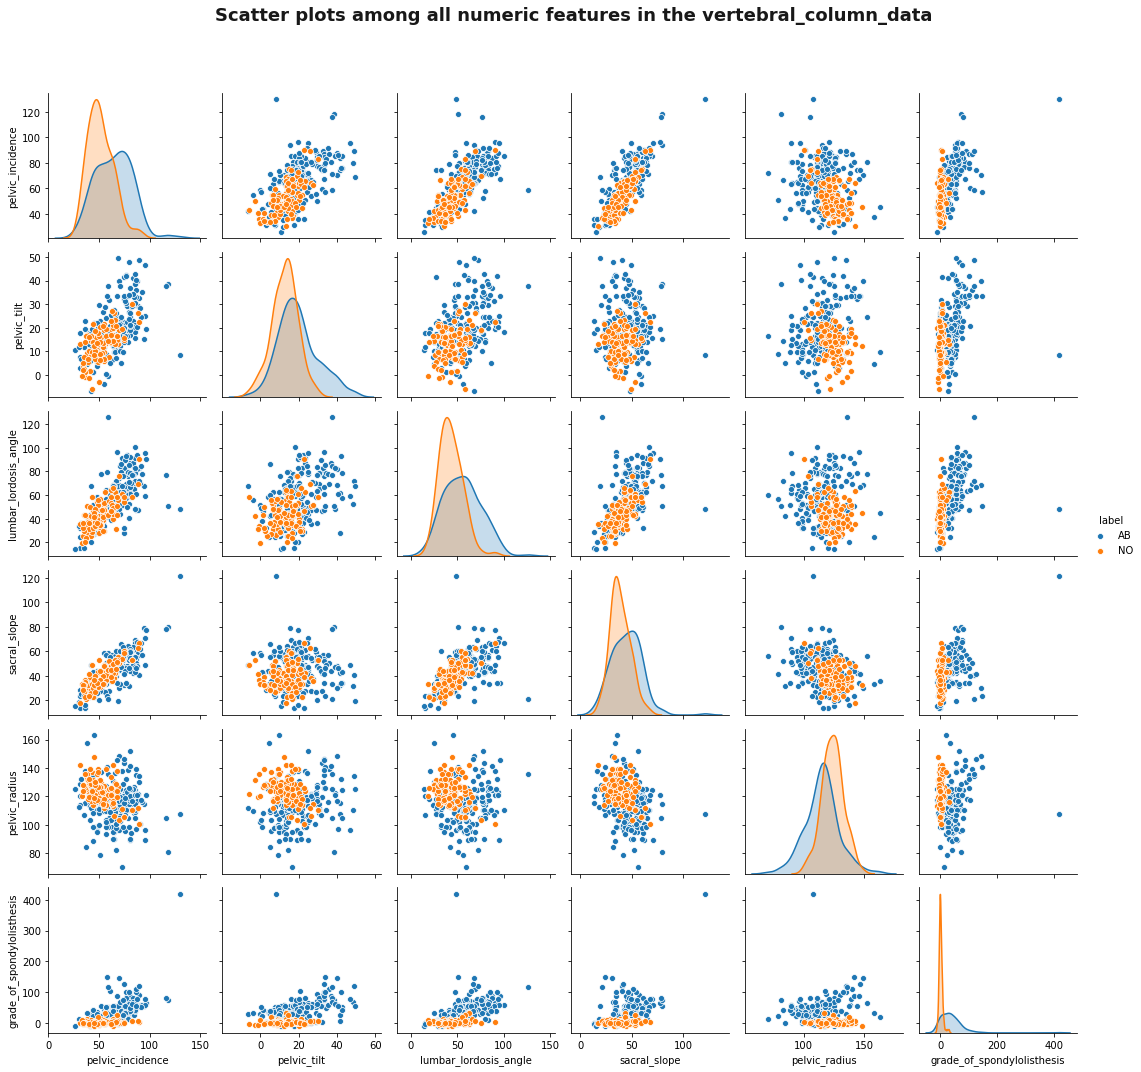

In [3]:
figure = sns.pairplot(df2, hue='label',vars=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis'],)
plt.subplots_adjust(top=0.9)
figure.fig.suptitle("Scatter plots among all numeric features in the vertebral_column_data", fontsize=18, alpha=0.9, weight='bold')
plt.show()

### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

Text(0.5, 1.1, 'Boxplot of pelvic_incidence')

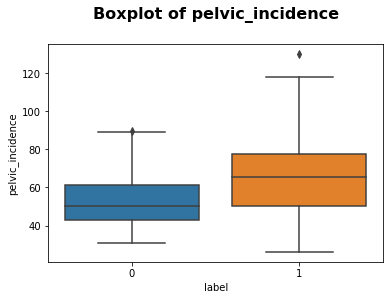

In [4]:
df2.loc[(df2.label == 'AB'),'label']=1
df2.loc[(df2.label == 'NO'),'label']=0
df2['label'] = pd.to_numeric(df2['label'])
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='label', y='pelvic_incidence', data=df2, orient='v')
ax.text(x=0.5, y=1.1, s="Boxplot of pelvic_incidence", fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

Text(0.5, 1.1, 'Boxplot of pelvic_tilt')

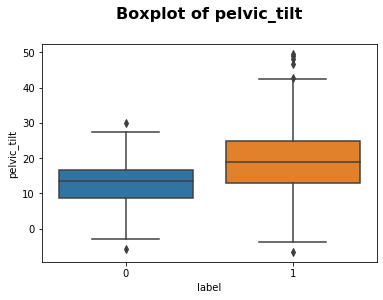

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='label', y='pelvic_tilt', data=df2, orient='v')
ax.text(x=0.5, y=1.1, s="Boxplot of pelvic_tilt", fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

Text(0.5, 1.1, 'Boxplot of lumbar_lordosis_angle')

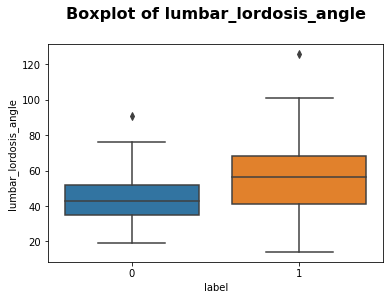

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='label', y='lumbar_lordosis_angle', data=df2, orient='v')
ax.text(x=0.5, y=1.1, s="Boxplot of lumbar_lordosis_angle", fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

Text(0.5, 1.1, 'Boxplot of sacral_slope')

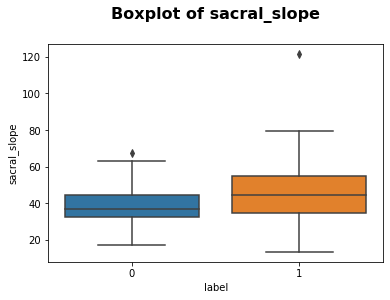

In [7]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='label', y='sacral_slope', data=df2, orient='v')
ax.text(x=0.5, y=1.1, s="Boxplot of sacral_slope", fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

Text(0.5, 1.1, 'Boxplot of pelvic_radius')

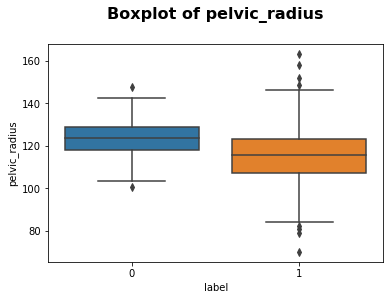

In [8]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='label', y='pelvic_radius', data=df2, orient='v')
ax.text(x=0.5, y=1.1, s="Boxplot of pelvic_radius", fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

Text(0.5, 1.1, 'Boxplot of grade_of_spondylolisthesis')

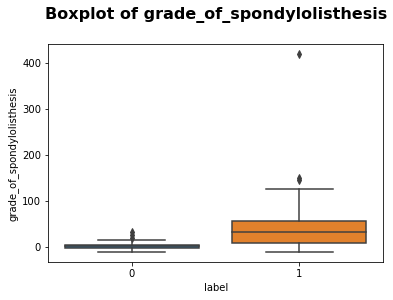

In [9]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='label', y='grade_of_spondylolisthesis', data=df2, orient='v')
ax.text(x=0.5, y=1.1, s="Boxplot of grade_of_spondylolisthesis", fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [10]:
#df_array = df2.values
#min_max_scaler = preprocessing.MinMaxScaler() 
#df_copy = min_max_scaler.fit_transform(df_array)
#df2 = pd.DataFrame(df_copy)
#df2.columns = (['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle','sacral slope','pelvic radius','grade of spondylolisthesis','label'])
#df2[['label']]= df2[['label']].astype(int)

In [11]:
label_1 = df2[df2.label == 1] #210 rows total
label_1_train = label_1.iloc[0:140]
label_1_test = label_1.iloc[140:210]

label_0 = df2[df2.label == 0] #100 rows total
label_0_train = label_0.iloc[0:70]
label_0_test = label_0.iloc[70:100]

train_set = pd.concat([label_0_train,label_1_train])
test_set = pd.concat([label_0_test,label_1_test])

x_train = train_set.iloc[: , :6].values.tolist()
x_test = test_set.iloc[: , :6].values.tolist()
y_train = train_set['label'].values.flatten().tolist()
y_test = test_set['label'].values.flatten().tolist()

train_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


In [12]:
test_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
280,50.09,13.43,34.46,36.66,119.13,3.09,0
281,64.26,14.50,43.90,49.76,115.39,5.95,0
282,53.68,13.45,41.58,40.24,113.91,2.74,0
283,49.00,13.11,51.87,35.88,126.40,0.54,0
284,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29,1
206,95.48,46.55,59.00,48.93,96.68,77.28,1
207,74.09,18.82,76.03,55.27,128.41,73.39,1
208,87.68,20.37,93.82,67.31,120.94,76.73,1


### (c) Classification using KNN on Vertebral Column Data Set

### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).
### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2

the best k is 4.
true positive rare= 69/(69+1) = 0.99
true negative rate= 25/(25+5) = 0.83
overall precision is 0.94
f1-score is 0.96

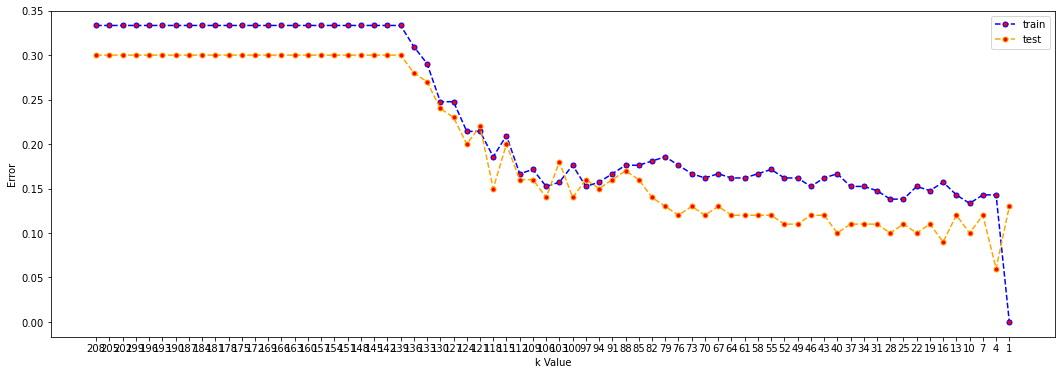

Best test error rate: 0.06000000000000005


In [13]:
#scaler = StandardScaler()
#scaler.fit(x_train)
#scaler.fit(x_test)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

train_error = []
test_error = []
for i in range(208,0,-3):    
    knn = KNeighborsClassifier(n_neighbors=i,p=2,metric = 'euclidean')
    knn.fit(x_train, y_train)
    pred1= knn.predict(x_train)
    train_error.append(1-knn.score(x_train,y_train))
    pred2= knn.predict(x_test)
    test_error.append(1-knn.score(x_test,y_test))
    
plt.figure(figsize=(18,6))
plt.plot(range(208,0,-3),train_error,label="train",color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.plot(range(208,0,-3),test_error,label="test",color = 'orange', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.gca().invert_xaxis()
plt.xticks(np.arange(208,0,-3))
plt.show()
print('Best test error rate:',min(test_error))

In [14]:
# k = 4 is the most suitable k

# k = 4; using test set:
knn = KNeighborsClassifier(n_neighbors=4, p=2, metric = 'euclidean')
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test, y_predict))
#true positive rare= 69/(69+1) = 0.99
#true negative rate= 25/(25+5) = 0.83
#precision and f1-score as follows:

[[25  5]
 [ 1 69]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}. Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

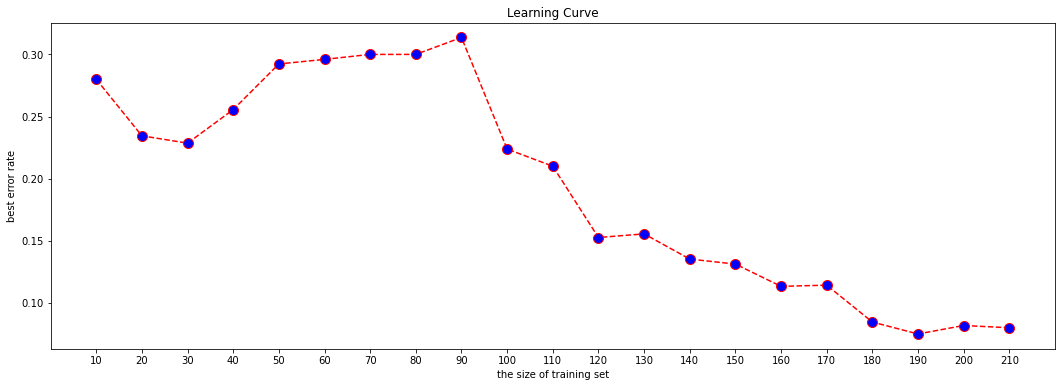

Best test error rate: 0.07499999999999996


In [15]:
df2_1 = df2[df2.label == 1]
df2_0 = df2[df2.label == 0]

train_set_learning = []
best_test_err_rate = []
for i in range(10, 211, 10):
    num_0 = int(i/3)
    num_1 = i - num_0
    train_set_learning = pd.concat([df2_0.iloc[0:num_0],df2_1.iloc[0:num_1]])
    test_set_learning = pd.concat([df2_0.iloc[num_0:100],df2_1.iloc[num_1:210]])
    
    x_train = train_set_learning.iloc[: , :6].values.tolist()
    x_test = test_set_learning.iloc[: , :6].values.tolist()
    y_train = train_set_learning['label'].values.flatten().tolist()
    y_test = test_set_learning['label'].values.flatten().tolist()
    
    test_error_list = []
    for j in range(1, i, 5):
        knn = KNeighborsClassifier(n_neighbors=j,p=2,metric = 'euclidean')
        knn.fit(x_train, y_train)
        pred2= knn.predict(x_test)
        test_error_list.append(1-knn.score(x_test,y_test))
    best_test_err = min(test_error_list)
    best_test_err_rate.append(best_test_err)

plt.figure(figsize=(18,6))
plt.plot(range(10,211,10),best_test_err_rate, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.xlabel('the size of training set')
plt.ylabel('best error rate')
plt.xticks(np.arange(10,211,10))
plt.title('Learning Curve')
plt.show()
print('Best test error rate:',min(best_test_err_rate))

### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

### i. Minkowski Distance:
### A. which becomes Manhattan Distance with p = 1.

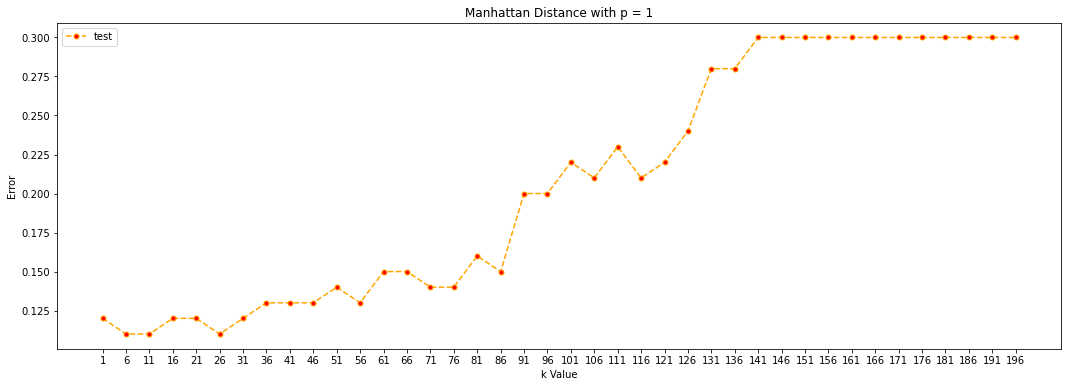

Best test error rate: 0.10999999999999999


In [16]:
x_train = train_set.iloc[: , :6].values.tolist()
x_test = test_set.iloc[: , :6].values.tolist()
y_train = train_set['label'].values.flatten().tolist()
y_test = test_set['label'].values.flatten().tolist()

test_error_a= []
for i in range(1,197,5):    
    knn = KNeighborsClassifier(n_neighbors=i,p=1,metric = 'manhattan')
    knn.fit(x_train, y_train)
    pred2= knn.predict(x_test)
    test_error_a.append(1-knn.score(x_test,y_test))

plt.figure(figsize=(18,6))
plt.plot(range(1,197,5),test_error_a,label="test",color = 'orange', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.xticks(np.arange(1,197,5))
plt.title('Manhattan Distance with p = 1')
plt.show()
#k = 6 is the best k
print('Best test error rate:',min(test_error_a))

### i. Minkowski Distance:
### B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

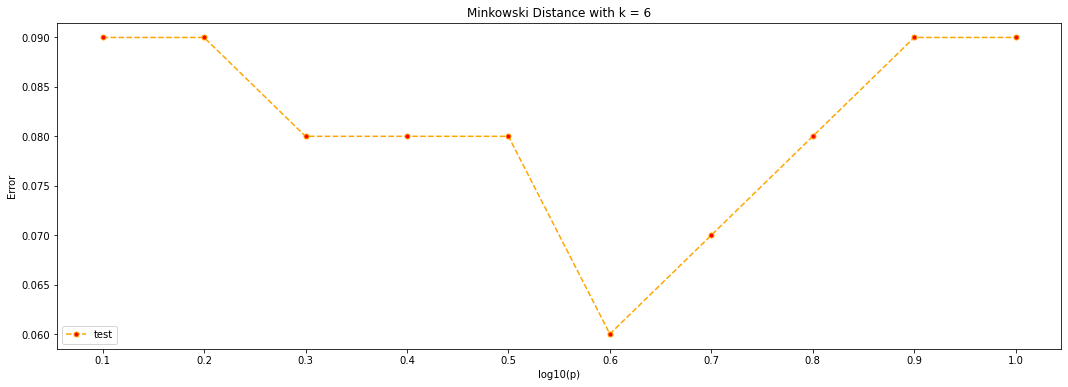

Best test error rate: 0.06000000000000005


In [17]:
test_error_b = []
lst = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for j in lst:    
    knn = KNeighborsClassifier(n_neighbors = 6, p = 10 ** j, metric = 'minkowski')
    knn.fit(x_train, y_train)
    pred2= knn.predict(x_test)
    test_error_b.append(1-knn.score(x_test,y_test))

plt.figure(figsize=(18,6))
plt.plot(lst,test_error_b,label="test",color = 'orange', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.xlabel('log10(p)')
plt.ylabel('Error')
plt.legend()
plt.xticks(lst)
plt.title('Minkowski Distance with k = 6')
plt.show()
print('Best test error rate:',min(test_error_b))
#log10(p) = 0.6 is the best result

### i. Minkowski Distance:
    
### C. which becomes Chebyshev Distance with p → ∞

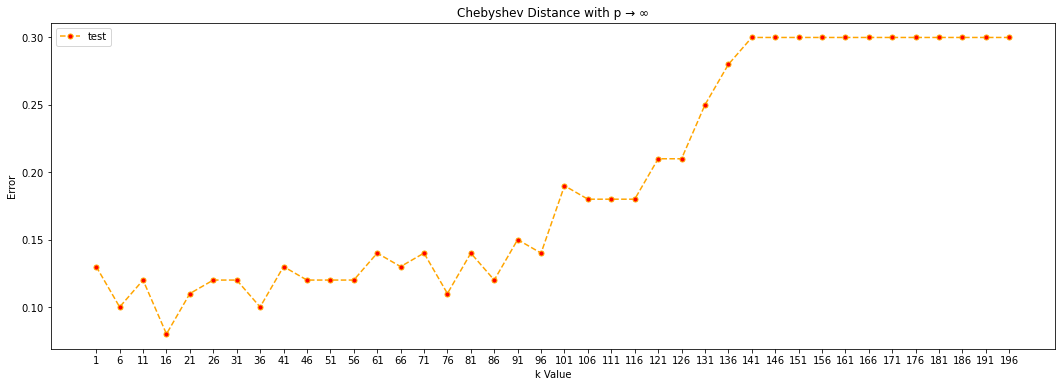

Best test error rate: 0.07999999999999996


In [18]:
test_error_c = []

for i in range(1,197,5):
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'chebyshev')
    knn.fit(x_train, y_train)
    pred2= knn.predict(x_test)
    test_error_c.append(1-knn.score(x_test,y_test))

plt.figure(figsize=(18,6))
plt.plot(range(1,197,5),test_error_c,label="test",color = 'orange', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.xticks(range(1,197,5))
plt.title('Chebyshev Distance with p → ∞')
plt.show()
print('Best test error rate:',min(test_error_c))
# k = 16 is the best k

### ii. Mahalanobis Distance.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  war

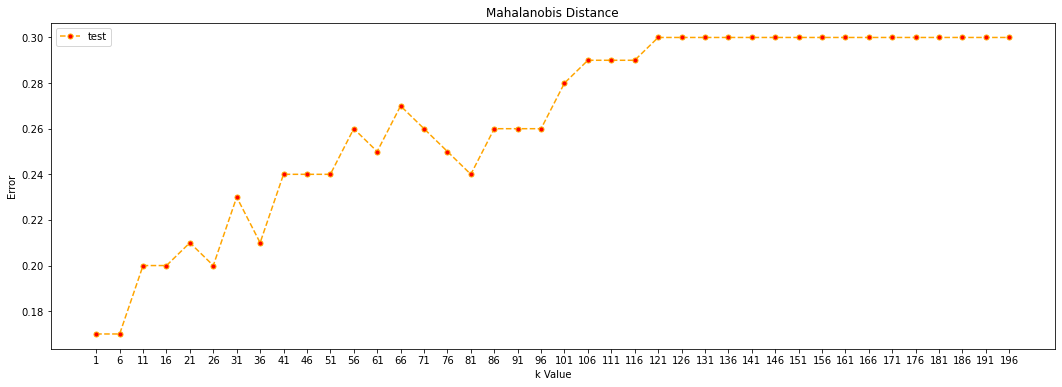

Best test error rate: 0.17000000000000004


In [19]:
test_error_d = []

for i in range(1,197,5):
    knn = KNeighborsClassifier(n_neighbors = i, metric_params = {'V': np.cov(x_train, rowvar=False)}, metric = 'mahalanobis')
    knn.fit(x_train, y_train)
    pred2= knn.predict(x_test)
    test_error_d.append(1-knn.score(x_test,y_test))

plt.figure(figsize=(18,6))
plt.plot(range(1,197,5),test_error_d,label="test",color = 'orange', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.xticks(range(1,197,5))
plt.title('Mahalanobis Distance')
plt.show()
print('Best test error rate:',min(test_error_d))
#k = 1, 6 are the best k's

In [20]:
result_table = pd.DataFrame({'Metric': ['Manhattan Distance', 'Minkowski Disttance', 'Chebyshev Distance', 'Mahalanobis Distance'],\
                            'Params': ['p = 1', 'p∈{0.1, 0.2,…1}, k = 6', 'p --> ∞', 'V'],\
                            'Best Result': ['k = 6, 11, 26', 'log10(p) = 0.6', 'k = 16', 'k = 1,6'],\
                            'Best Test Error':[0.10999, 0.06, 0.07999, 0.17]})
result_table


,Metric,Params,Best Result,Best Test Error
0,Manhattan Distance,p = 1,"k = 6, 11, 26",0.10999
1,Minkowski Disttance,"p∈{0.1, 0.2,…1}, k = 6",log10(p) = 0.6,0.06000
2,Chebyshev Distance,p --> ∞,k = 16,0.07999
3,Mahalanobis Distance,V,"k = 1,6",0.17000


### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.


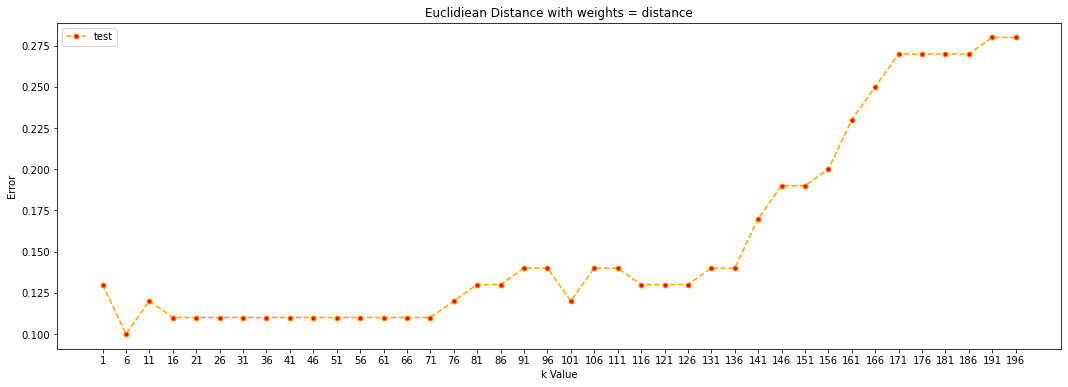

Best test error rate: 0.09999999999999998


In [21]:
#Euclidiean
test_error_e1 = []
for i in range(1,197,5):    
    knn = KNeighborsClassifier(n_neighbors=i,metric = 'euclidean',weights = 'distance')
    knn.fit(x_train, y_train)
    pred2= knn.predict(x_test)
    test_error_e1.append(1-knn.score(x_test,y_test))
    
plt.figure(figsize=(18,6))
plt.plot(range(1,197,5),test_error_e1,label="test",color = 'orange', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.xticks(range(1,197,5))
plt.title('Euclidiean Distance with weights = distance')
plt.show()
print('Best test error rate:',min(test_error_e1))
#k = 6 is the best k
#best test error ~ 0.1

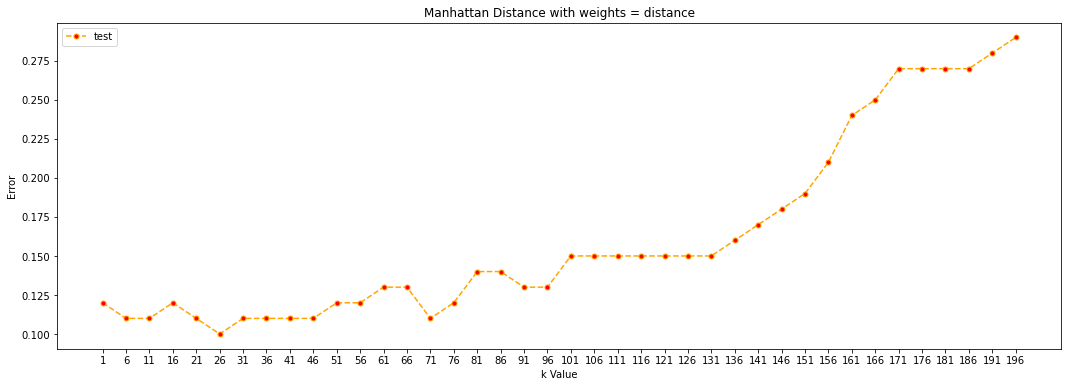

0.09999999999999998


In [22]:
#Manhattan
test_error_e2 = []
for i in range(1,197,5):    
    knn = KNeighborsClassifier(n_neighbors=i,metric = 'manhattan',weights = 'distance')
    knn.fit(x_train, y_train)
    pred2= knn.predict(x_test)
    test_error_e2.append(1-knn.score(x_test,y_test))
    
plt.figure(figsize=(18,6))
plt.plot(range(1,197,5),test_error_e2,label="test",color = 'orange', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.xticks(range(1,197,5))
plt.title('Manhattan Distance with weights = distance')
plt.show()
print(min(test_error_e2))
#k = 26 is the best k
#best test error ~ 0.1

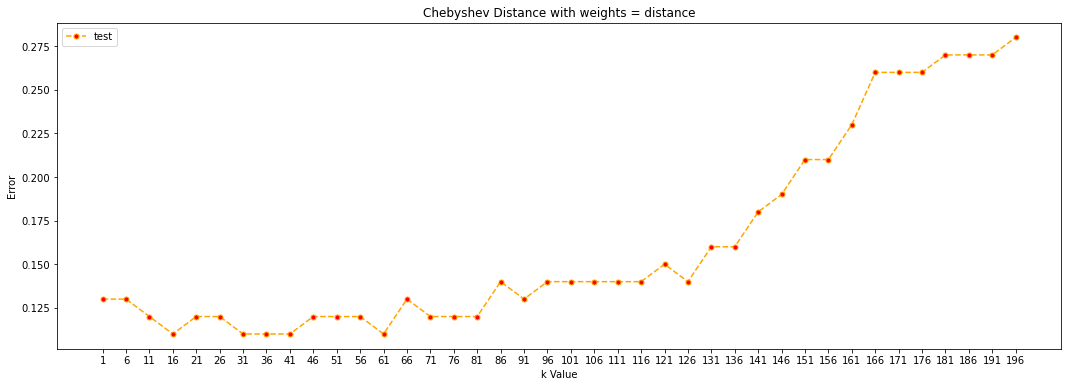

0.10999999999999999


In [23]:
#Chebyshev
test_error_e3 = []
for i in range(1,197,5):    
    knn = KNeighborsClassifier(n_neighbors=i,metric = 'chebyshev',weights = 'distance')
    knn.fit(x_train, y_train)
    pred2= knn.predict(x_test)
    test_error_e3.append(1-knn.score(x_test,y_test))
    
plt.figure(figsize=(18,6))
plt.plot(range(1,197,5),test_error_e3,label="test",color = 'orange', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.xticks(range(1,197,5))
plt.title('Chebyshev Distance with weights = distance')
plt.show()
print(min(test_error_e3))
#k = 16, 31, 36, 41, 61 are the best k's
#best error rate ~ 0.11

In [24]:
result_table_e = pd.DataFrame({'Metric': ['Euclidiean Distance', 'Manhattan Distance', 'Chebyshev Distance'],\
                            'Best k': ['6', '26', '16, 31, 36, 41, 61'], 'Best error rate':[0.099999,0.099999,0.109999]})
result_table_e

,Metric,Best k,Best error rate
0,Euclidiean Distance,6,0.099999
1,Manhattan Distance,26,0.099999
2,Chebyshev Distance,"16, 31, 36, 41, 61",0.109999


### (f) What is the lowest training error rate you achieved in this homework?

The lowest training error rate achieved in this homework is 0